In [1]:
#%%
import pandas as pd
import numpy as np
import matplotlib as plt
import plotly.express as px
import plotly.graph_objs as go

In [2]:
#%% md
## Clustering onto groups of s(t): KNN and Louvain algorithm
#%%
!pip install scanpy



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\User\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
!pip install louvain


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\User\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
import numpy as np
import pandas as pd
import scanpy as sc
from sklearn.neighbors import NearestNeighbors
import louvain
import plotly.express as px

In [5]:
cells = pd.read_csv("adata_genes_4530.csv")

# CHECK HOW MANY CELLS OVER ALL WHERE CLOSE TO TUMER
print("Percent of cells close to tumer OVERALL: {}".format(100 * len(cells[cells["count_tumor_total"] == 1]) / len(cells)))


Percent of cells close to tumer OVERALL: 15.121412803532008


In [8]:
cd8a_data = {}

for t in [1.4, 2.0, 2.2, 2.4, 2.6, 2.8, 3.0, 3.2,4.2, 4.4, 4.6, 4.8, 5.0, 5.2, 5.4, 5.6,5.8]:
    cd8a_data[t] = pd.read_csv(f"df/T-cell_CD8A_{t}.csv")
    cd8a_percent = 100 * len([cd8a_data[t]["isClose"] == 1]) / len(cd8a_data[t])
    print("Percent of cells close to tumer T-CELL CD8A: {}".format(cd8a_percent))

Percent of cells close to tumer T-CELL CD8A: 0.15673981191222572
Percent of cells close to tumer T-CELL CD8A: 0.15673981191222572
Percent of cells close to tumer T-CELL CD8A: 0.15673981191222572
Percent of cells close to tumer T-CELL CD8A: 0.15673981191222572
Percent of cells close to tumer T-CELL CD8A: 0.15673981191222572
Percent of cells close to tumer T-CELL CD8A: 0.15673981191222572
Percent of cells close to tumer T-CELL CD8A: 0.15673981191222572
Percent of cells close to tumer T-CELL CD8A: 0.15673981191222572
Percent of cells close to tumer T-CELL CD8A: 0.15673981191222572
Percent of cells close to tumer T-CELL CD8A: 0.15673981191222572
Percent of cells close to tumer T-CELL CD8A: 0.15673981191222572
Percent of cells close to tumer T-CELL CD8A: 0.15673981191222572
Percent of cells close to tumer T-CELL CD8A: 0.15673981191222572
Percent of cells close to tumer T-CELL CD8A: 0.15673981191222572
Percent of cells close to tumer T-CELL CD8A: 0.15673981191222572
Percent of cells close to

##T-cell_CD8A

In [10]:
#%%
# full PCA df of only T-cell_CD4 type (52 cellls)


s_all_PCs_subset = pd.read_csv('df/T-cell_CD8A_2.0.csv', index_col=0)
s_all_PCs_subset

,Unnamed: 0,pc1,pc2,pc3,labels_c,isClose
Unnamed: 0.1,,,,,,
423,X100.27.053,0.163748,-0.697540,0.822975,T-cell_CD8A,0
713,X100.4.076,-0.368522,-3.122865,-1.323423,T-cell_CD8A,0
950,X100.5.041,0.517167,0.133031,-0.472518,T-cell_CD8A,0
976,X100.50.075,-0.251434,0.602726,-0.050301,T-cell_CD8A,1
1167,X100.6.075,2.082864,-0.450615,-0.064225,T-cell_CD8A,1
...,...,...,...,...,...,...
4336,X982.60.006,-0.430137,-0.193975,0.104269,T-cell_CD8A,0
4352,X982.62.017,-0.282358,0.392002,1.412993,T-cell_CD8A,0
4360,X982.63.031,-0.620721,-0.113320,0.382433,T-cell_CD8A,0


In [11]:
#%%

s_all_PCs_subset = s_all_PCs_subset[['pc1', 'pc2', 'pc3']]
s_all_PCs_subset

,pc1,pc2,pc3
Unnamed: 0.1,,,
423,0.163748,-0.697540,0.822975
713,-0.368522,-3.122865,-1.323423
950,0.517167,0.133031,-0.472518
976,-0.251434,0.602726,-0.050301
1167,2.082864,-0.450615,-0.064225
...,...,...,...
4336,-0.430137,-0.193975,0.104269
4352,-0.282358,0.392002,1.412993
4360,-0.620721,-0.113320,0.382433


In [12]:
#%%
import scanpy as sc
import pandas as pd

# Create an AnnData object from the PCA results DataFrame
adata = sc.AnnData(s_all_PCs_subset)

# Find nearest neighbors
sc.pp.neighbors(adata, n_neighbors=180) #change number of n_neighbors according to the number of clusters you would like to obtain

# Perform Louvain clustering
sc.tl.louvain(adata)

# Access the cluster labels
cluster_labels = adata.obs['louvain']

# Print the first 10 cluster labels
print(cluster_labels[:10])

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\anndata\_core\aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Unnamed: 0.1
423     0
713     2
950     2
976     2
1167    0
1273    2
1516    2
1545    2
1546    0
1547    0
Name: louvain, dtype: category
Categories (3, object): ['0', '1', '2']


In [13]:
#%%
cluster_labels = cluster_labels.reset_index(drop=True)
s_all_PCs_subset = s_all_PCs_subset.reset_index()#drop=True)
#%%
# Add the cluster labels as a column in the DataFrame
s_all_PCs_subset['Cluster'] = cluster_labels.astype(str)
#s_all_PCs_subset = s_all_PCs_subset.set_index('index')
s_all_PCs_subset

,Unnamed: 0.1,pc1,pc2,pc3,Cluster
0,423,0.163748,-0.697540,0.822975,0
1,713,-0.368522,-3.122865,-1.323423,2
2,950,0.517167,0.133031,-0.472518,2
3,976,-0.251434,0.602726,-0.050301,2
4,1167,2.082864,-0.450615,-0.064225,0
...,...,...,...,...,...
633,4336,-0.430137,-0.193975,0.104269,2
634,4352,-0.282358,0.392002,1.412993,0
635,4360,-0.620721,-0.113320,0.382433,2
636,4410,-0.642720,0.073358,-0.278064,2


In [14]:
#%%
import plotly.express as px
# Create the 3D scatter plot
names = cd8a_data[2.0]['Unnamed: 0']
fig = px.scatter_3d(s_all_PCs_subset, x='pc1', y='pc2', z='pc3', color='Cluster',hover_name= names)

# Customize the plot layout
fig.update_layout(
    scene=dict(
        xaxis=dict(title='PC1'),
        yaxis=dict(title='PC2'),
        zaxis=dict(title='PC3')
    )
)

# Show the plot
fig.show()


In [15]:
# type(s_all_PCs_subset['Cluster'])
second_column = list(s_all_PCs_subset['Cluster'])
second_column = [int(x) for x in second_column]
print(second_column)

[0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 1, 2, 1, 0, 0, 0, 2, 1, 0, 1, 0, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 2, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 2, 1, 0, 1, 0, 1, 2, 1, 1, 0, 1, 1, 1, 1, 2, 2, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 2, 0, 0, 0, 0, 0, 1, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0, 1, 0, 0, 1, 1, 2, 1, 1, 1, 0, 1, 1, 0, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 2, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 2, 1, 2, 1, 2, 2, 1, 0, 0, 2, 2, 0, 1, 1, 2, 1, 1, 1, 1, 1, 0, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 0, 0, 1, 0, 0, 2, 2, 1, 2, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 2, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 2, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 2, 0, 2, 1, 1, 1, 0, 1, 2, 0, 1, 1, 1, 0, 1, 0, 2, 2, 2, 0, 0, 1, 2, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 

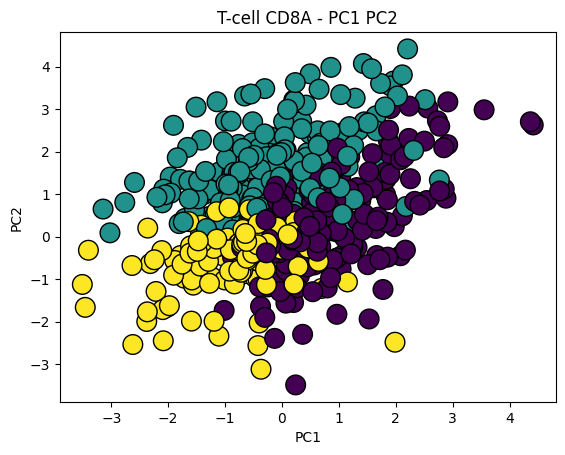

In [16]:
#%%
import plotly.express as px
import matplotlib.pyplot as plt
# Create the 3D scatter plot
names = cd8a_data[2.0]['Unnamed: 0']
# points = [(x,y) for x,y in zip(s_all_PCs_subset['pc1'],s_all_PCs_subset['pc2'])]
plt.scatter(s_all_PCs_subset['pc1'],s_all_PCs_subset['pc2'], s=200, edgecolors='black', c=second_column)
plt.title("T-cell CD8A - PC1 PC2")
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.savefig(f'after cluster/PC1_PC2_2.0.png')
# Show the plot
plt.show()


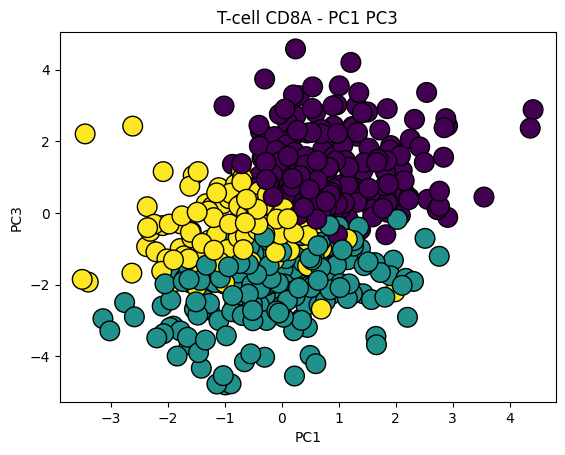

In [17]:
plt.scatter(s_all_PCs_subset['pc1'],s_all_PCs_subset['pc3'], s=200, edgecolors='black', c=second_column)
plt.title("T-cell CD8A - PC1 PC3")
plt.xlabel('PC1')
plt.ylabel('PC3')

plt.savefig(f'after cluster/PC1_PC3_2.0.png')
# Show the plot
plt.show()

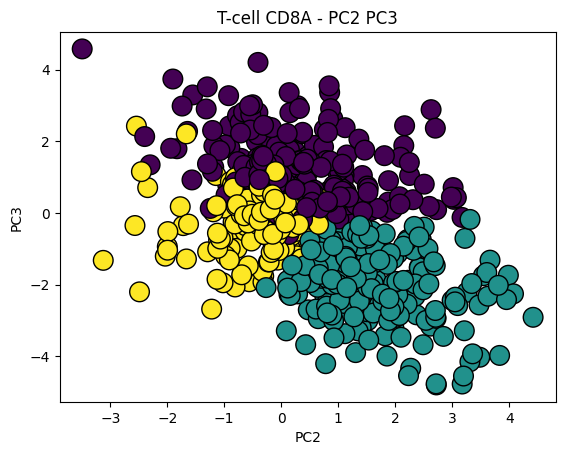

In [18]:
plt.scatter(s_all_PCs_subset['pc2'],s_all_PCs_subset['pc3'], s=200, edgecolors='black', c=second_column)
plt.title("T-cell CD8A - PC2 PC3")
plt.xlabel('PC2')
plt.ylabel('PC3')

plt.savefig(f'after cluster/PC2_PC3_2.0.png')
# Show the plot
plt.show()

In [20]:
# Combine isClose with data frame in order to caluclate how many cells from each cluster where close to Tumor
s_all_PCs_subset["isClose"] = pd.read_csv("df/T-cell_CD8A_2.0.csv")["isClose"]
s_all_PCs_subset

,Unnamed: 0.1,pc1,pc2,pc3,Cluster,isClose
0,423,0.163748,-0.697540,0.822975,0,0
1,713,-0.368522,-3.122865,-1.323423,2,0
2,950,0.517167,0.133031,-0.472518,2,0
3,976,-0.251434,0.602726,-0.050301,2,1
4,1167,2.082864,-0.450615,-0.064225,0,1
...,...,...,...,...,...,...
633,4336,-0.430137,-0.193975,0.104269,2,0
634,4352,-0.282358,0.392002,1.412993,0,0
635,4360,-0.620721,-0.113320,0.382433,2,0
636,4410,-0.642720,0.073358,-0.278064,2,0


In [25]:
## PERCENTAGE OF CELLS CLOSE TO TUMOR ##
num_close_all_cd8 = len(s_all_PCs_subset[s_all_PCs_subset["isClose"] == 1])
num_all_cells = len(s_all_PCs_subset)


,Unnamed: 0.1,pc1,pc2,pc3,Cluster,isClose
0,423,0.163748,-0.697540,0.822975,0,0
4,1167,2.082864,-0.450615,-0.064225,0,1
8,1546,0.604010,1.423049,1.044078,0,0
9,1547,-0.248262,-1.184561,1.277523,0,0
13,1552,2.543875,0.849377,3.364347,0,0
...,...,...,...,...,...,...
627,4033,-0.151158,1.035628,0.451256,0,1
629,4105,0.773695,0.810131,0.319878,0,0
632,4295,0.487303,0.241043,0.658674,0,0
634,4352,-0.282358,0.392002,1.412993,0,0


In [27]:
## PERCENTAGE OF CELLS CLOSE TO TUMOR ##
num_close_all_cd8 = len(s_all_PCs_subset[s_all_PCs_subset["isClose"] == 1])
num_close_all_cd8
num_all_cells = len(s_all_PCs_subset)
num_all_cells

cluster0 = s_all_PCs_subset[s_all_PCs_subset["Cluster"] == '0']
cluster1 = s_all_PCs_subset[s_all_PCs_subset["Cluster"] == '1']
cluster2 = s_all_PCs_subset[s_all_PCs_subset["Cluster"] == '2']

# Cluster 0
sum0 = (cluster0["isClose"] == 1).sum()
percentage0 = (sum0 / len(cluster0)) * 100

percentage0_compered_all = percentage0 / cd8a_percent

# Cluster 1
sum1 = (cluster1["isClose"] == 1).sum()
percentage1 = (sum1 / len(cluster1)) * 100

percentage1_compered_all = percentage1 / cd8a_percent

# Cluster 2
sum2 = (cluster2["isClose"] == 1).sum()
percentage2 = (sum2 / len(cluster2)) * 100

percentage2_compered_all = percentage2 / cd8a_percent

print("T-cell CD8A:\n\nPERCENTAGE OF CLOSE CLUSTER COMPERED ALL CELLS IN CLUSTER:\nCLUSTER 0: {}\nCLUSTER 1: {}\nCLUSTER 2: {}\n".format(percentage0, percentage1, percentage2))
print("PERCENTAGE OF CLOSE CLUSTER COMPERED ALL CLOSE CD8A CELLS:\nCLUSTER 0: {}\nCLUSTER 1: {}\nCLUSTER 2: {}\n".format(percentage0_compered_all, percentage1_compered_all, percentage2_compered_all))

T-cell CD8A:

PERCENTAGE OF CLOSE CLUSTER COMPERED ALL CELLS IN CLUSTER:
CLUSTER 0: 3.79746835443038
CLUSTER 1: 2.586206896551724
CLUSTER 2: 3.5502958579881656

PERCENTAGE OF CLOSE CLUSTER COMPERED ALL CLOSE CD8A CELLS:
CLUSTER 0: 24.227848101265824
CLUSTER 1: 16.5
CLUSTER 2: 22.650887573964496



In [49]:
# REALIZATION #
import random

# ORIGIN PERCENTAGE - to compare our realizations
ORIGIN_PERCENTAGE0 = percentage0
ORIGIN_PERCENTAGE1 = percentage1
ORIGIN_PERCENTAGE2 = percentage2

c0_counter = 0
c1_counter = 0
c2_counter = 0

# get the origin clusters - to get cluster size
len0 = len(s_all_PCs_subset[s_all_PCs_subset["Cluster"] == '0'])
len1 = len(s_all_PCs_subset[s_all_PCs_subset["Cluster"] == '1'])
len2 = len(s_all_PCs_subset[s_all_PCs_subset["Cluster"] == '2'])

print("len0={}, len1={}, len2={}".format(len0, len1, len2))

def count_ones(my_list):
    ones_count = 0
    for element in my_list:
        if element == 1:
            ones_count += 1
    return ones_count

def calculate(cluster0, cluster1, cluster2):
  # Cluster 0
  sum0 = count_ones(cluster0)
  percentage0 = (sum0 / len0) * 100
  #percentage0_compered_all = percentage0 / cd3d_percent

  # Cluster 1
  sum1 = count_ones(cluster1)
  percentage1 = (sum1 / len1) * 100
  #percentage1_compered_all = percentage1 / cd3d_percent

  # Cluster 2
  sum2 = count_ones(cluster2)
  percentage2 = (sum2 / len2) * 100
  #percentage2_compered_all = percentage2 / cd3d_percent

  return percentage0, percentage1, percentage2

def random_partition():
  ## Function returns the vector with 0 and 1
  total_cells = len(s_all_PCs_subset)
  # create a list to represent if cell is close or not to tumor
  isClose = [0] * total_cells

  # Randomly switch zeros to ones based on the given probability
  for i in range(total_cells):
      if random.random() < (cd8a_percent /100):
          isClose[i] = 1

  cluster0 = isClose[:len0]
  cluster1 = isClose[len0:len0+len1]
  cluster2 = isClose[len0+len1:len0+len1+len2]
  # print("cluster0={}, cluster1={}, cluster2={}".format(cluster0, cluster1, cluster2))

  return cluster0, cluster1, cluster2

def random_partition2(list1, list2, list3, x):
  size1, size2, size3 = len(list1), len(list2), len(list3)

  while True:
    num1 = random.randint(0, min(x, size1))
    num2 = random.randint(0, min(x - num1, size2))
    num3 = x - num1 - num2

    if num3 >= 0 and num3 <= size3:
        break
  # Randomly place "1" values in each list
  list1_indices = random.sample(range(size1), num1)
  # print("list: {}".format(list1_indices))
  list2_indices = random.sample(range(size2), num2)
  list3_indices = random.sample(range(size3), num3)

  list1 = [1 if i in list1_indices else 0 for i in range(size1)]
  list2 = [1 if i in list2_indices else 0 for i in range(size2)]
  list3 = [1 if i in list3_indices else 0 for i in range(size3)]

  return list1, list2, list3



def check_realization(p0, p1, p2):
  global c0_counter, c1_counter, c2_counter
  if p0 >= ORIGIN_PERCENTAGE0:
    # print("p0 = {}".format(p0))
    c0_counter += 1

  if p1 >= ORIGIN_PERCENTAGE1:
    c1_counter += 1

  if p2 >= ORIGIN_PERCENTAGE2:
    c2_counter += 1


# main

# do realizations for 1000 times
num_realizations = 100000
for i in range(num_realizations):
  # c0, c1, c2 = random_partition2([0]*len0, [0]*len1, [0]*len2, len(cd8a[cd8a["isClose"] == 1]))
  c0, c1, c2 = random_partition()

  p0, p1, p2 = calculate(c0, c1, c2)

  # check realization values compared to origin
  check_realization(p0, p1, p2)

# After finish realizations - check if p-value is low or not
p_value0 = c0_counter / num_realizations
p_value1 = c1_counter / num_realizations
p_value2 = c2_counter / num_realizations

print("P_VALUE:\nCluster0 = {}\nCluster1 = {}\nCluster2 = {}\n".format(p_value0, p_value1, p_value2))

P_VALUE:
Cluster0 = 0.0
Cluster1 = 0.0
Cluster2 = 0.0



In [50]:
100 * sum2 / num_close_all_cd8

28.571428571428573

In [51]:
#%%
# type(s_all_PCs_subset['Cluster'])
second_column = list(s_all_PCs_subset['Cluster'])
second_column = [int(x) for x in second_column]

import plotly.express as px
import matplotlib.pyplot as plt
# Create the 3D scatter plot
names = cd8a['Unnamed: 0']

scatter = plt.scatter(s_all_PCs_subset['pc1'],s_all_PCs_subset['pc2'], s=200, edgecolors='black', c=second_column)
plt.legend(*scatter.legend_elements(), title="Clusters")

temp = s_all_PCs_subset[s_all_PCs_subset["isClose"] == 1]
plt.scatter(temp['pc1'],temp['pc2'], s=200, edgecolors='black', c='red')


plt.title("T-cell CD8A - PC1 PC2")
plt.xlabel('PC1')
plt.ylabel('PC2')

# Show the plot
plt.show()


NameError: name 'cd8a' is not defined

In [ ]:
cells = pd.read_csv("adata_genes_1311.csv")

# CHECK HOW MANY CELLS OVER ALL WHERE CLOSE TO TUMER
print("Percent of cells close to tumer OVERALL: {}".format(100 * len(cells[cells["count_tumor_total"] == 1]) / len(cells)))
cd3d = pd.read_csv("T-cell_CD3D.csv")
print("Percent of cells close to tumer T-CELL CD3D: {}".format(100 * len(cd3d[cd3d["isClose"] == 1]) / len(cd3d)))
cd3e = pd.read_csv("T-cell_CD3E.csv")
print("Percent of cells close to tumer T-CELL CD3E: {}".format(100 * len(cd3e[cd3e["isClose"] == 1]) / len(cd3e)))
cd4 = pd.read_csv("T-cell_CD4.csv")
print("Percent of cells close to tumer T-CELL CD4: {}".format(100 * len(cd4[cd4["isClose"] == 1]) / len(cd4)))
cd8a = pd.read_csv("T-cell_CD8A.csv")
print("Percent of cells close to tumer T-CELL CD8A: {}".format(100 * len(cd8a[cd8a["isClose"] == 1]) / len(cd8a)))


Percent of cells close to tumer OVERALL: 34.40122044241038
Percent of cells close to tumer T-CELL CD3D: 30.434782608695652
Percent of cells close to tumer T-CELL CD3E: 34.54545454545455
Percent of cells close to tumer T-CELL CD4: 33.898305084745765
Percent of cells close to tumer T-CELL CD8A: 28.846153846153847


In [ ]:
len(cd8a[cd8a["isClose"] == 1])

15

In [ ]:
len(cells)

1311